http://www.cas.cmc.osaka-u.ac.jp/~paoon/Lectures/2022-8Semester-NA-basic/07-volterra-model/

In [ ]:
#初期値の設定
C1 = C2 = D1 = D2 = 1.0
u0 = v0 = 0.7
Δt = 0.05

In [ ]:
function euler(u,v)
   u_new = (1 + Δt * (  D1 - C1*v ) ) * u
   v_new = (1 + Δt * ( -D2 + C2*u ) ) * v

    #行列計算に変換する
   [u_new, v_new] = [1 Δt*C2; -Δt*C1 1] * [u; v
   return u_new, v_new 
end

In [ ]:
euler(u0,v0)

In [ ]:
u,v = u0, v0        # 初期値を入れて…
uv_sq = [ u0 v0 ]  # グラフを描きたいので、データをとっておこう

for i in 1:500
    u,v = euler(u,v)
    uv_sq = vcat(uv_sq, [ u v ])  # データを追加
end

In [ ]:
uv_sq

In [ ]:
using Plots

default( legend = :outertopright, xlabel = "time t", ylabel = "number" )

t_sq = Δt * [0:500]
plot(t_sq, uv_sq, label = ["魚 🐟" "鮫 🦈"], fontfamily="Hiragino" )

In [ ]:
lastT = 25   # 計算を終える時間(おおよそ)を設定．
Δt = 0.01    # Δt をさっきの 1/5 と，小さめに設定し直す．
N = round(Int, lastT/Δt)   # 最終時間ステップは整数に．

# 計算ステップ数を N に直し，あとは前と同様に．
u,v = u0, v0
uv_sq = [ u0 v0 ]

for i in 1:N
    u,v = euler(u,v)
    uv_sq = vcat(uv_sq, [ u v ])
end

In [ ]:
t_sq = Δt * [0:N]
plot(t_sq, uv_sq, label = ["魚 🐟" "鮫 🦈"], fontfamily="Meiryo" )

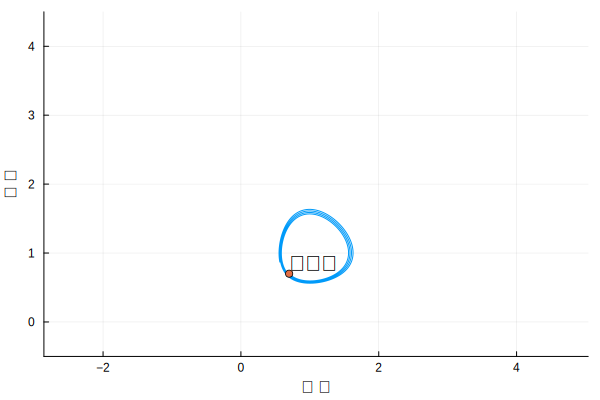

In [31]:
u_sq = uv_sq[:,1] # データの 1列目 = 魚の近似値の列．
v_sq = uv_sq[:,2] # データの 2列目 = サメの近似値の列．

plot(u_sq, v_sq)
plot!((u0,v0), marker = :circle, fontfamily="Meiryo",
  aspect_ratio = 1, legend = false,
  xaxis = "魚 🐟", yaxis = "鮫 🦈" )
# aspect_ratio は縦横の軸の比率．

annotate!(u0,v0, ("初期値", :bottom, :left)) # 好きな場所に注釈を書ける

In [47]:
function euler_fishing(u,v,E)
   new = [u_new, v_new]
   before = [u, v,u*v]
   matrix = [
      1+Δt*D1-Δt*E 0 -Δt*C1
      0 1-Δt*D2-Δt*E -Δt*C2
         ]
   new = matrix * before
   return new
end

euler_fishing (generic function with 1 method)

In [48]:
E = 0.5

lastT = 25
Δt = 0.01
N = round(Int, lastT/Δt)   # 最終時間ステップは整数に．

u,v = u0, v0
uv_f_sq = [ u0 v0 ]

for i in 1:N
    u,v = euler_fishing(u,v,E)
    uv_f_sq = vcat(uv_f_sq, [ u v ])
end

LoadError: UndefVarError: u_new not defined

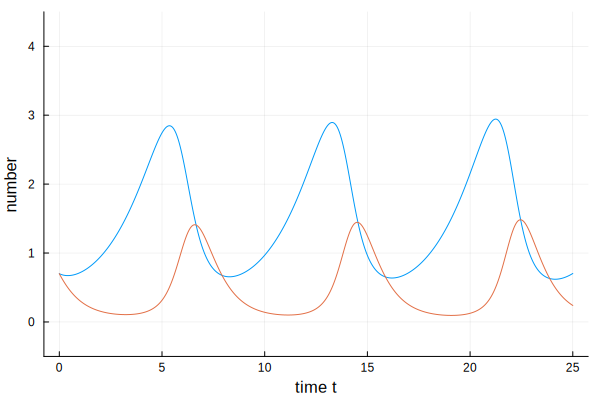

In [33]:
t_sq = Δt * [0:N]
plot(t_sq, uv_f_sq, label = ["魚 🐟" "鮫 🦈"], fontfamily="Meiryo" )

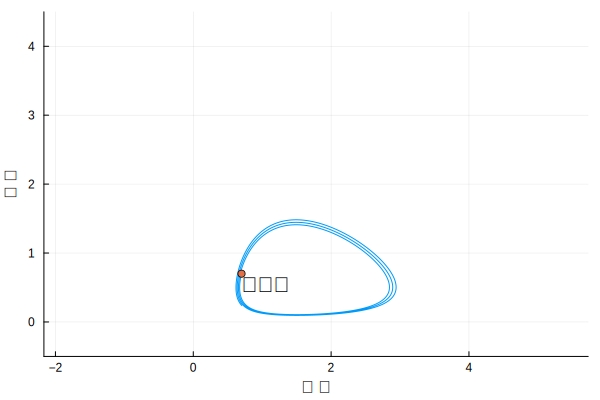

In [34]:
u_f_sq = uv_f_sq[:,1]
v_f_sq = uv_f_sq[:,2]

default(aspect_ratio = 1, legend = false,
  xaxis = "魚 🐟", yaxis = "鮫 🦈", fontfamily = "Meiryo" )
# 以降，楽をするためにデフォルト設定してしまえ．

plot(u_f_sq, v_f_sq)
plot!((u0,v0), marker = :circle)
annotate!( u0, v0, ("初期値", :top, :left))

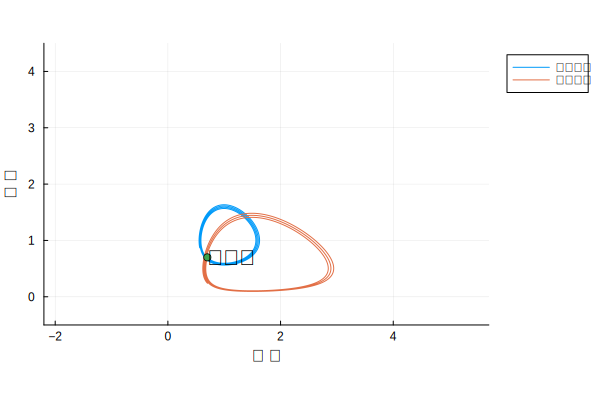

In [35]:
default( legend = :outertopright )

# 漁業効果無しのケースをプロットして、
plot(u_sq, v_sq, label = "漁業無し")

# 次に漁業効果有りのケースを描き足して、
plot!(u_f_sq, v_f_sq, label = "漁業有り")

# 初期値も描き足す
plot!((u0,v0), marker = :circle, label = false )
annotate!( u0, v0, ("初期値", :left))

In [ ]:
using Interact

In [30]:
default( ylims = (-0.5, 4.5), aspect_ratio = :none,
   xlabel = "time t", ylabel = "number" )
# グラフの描画範囲を統一することで見やすくする．
# この数字は，教官がさきにおおよそ計算したおいたもの．

@manipulate for E in 0.0:0.01:0.8

    # ここから end まではこれまでと本質的に同じ．
    u,v = u0, v0
    uv_f_sq = [ u0 v0 ]
    
    for i in 1:N
        u,v = euler_fishing(u,v,E)
        uv_f_sq = vcat(uv_f_sq, [ u v ])
    end

    plot(t_sq, uv_f_sq, label = ["魚 🐟" "鮫 🦈"], fontfamily="Meiryo" )
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["E"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 81, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(41), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/taketosaeki/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/taketosaeki/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/taketosaeki/.julia/packages/InteractBase/Qhvxg/src/../assets/all.js"), Asset("css", nothing, "/Users/taketosaeki/.julia/packages/InteractBase/Qhvxg/src/../assets/style.css"), Asset("css", nothing, "/Users/taketosaeki/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000179a32b30, Task (runnable) @0x0000000179a32b30), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23\",\"0.24\",\"0.25\",\"0.26\",\"0.27\",\"0.28\",\"0.29\",\"0.3\",\"0.31\",\"0.32\",\"0.33\",\"0.34\",\"0

[ Info: Saved animation to /Users/taketosaeki/Desktop/julia-making/tmp.gif


Plots.AnimatedGif("/Users/taketosaeki/Desktop/julia-making/tmp.gif")
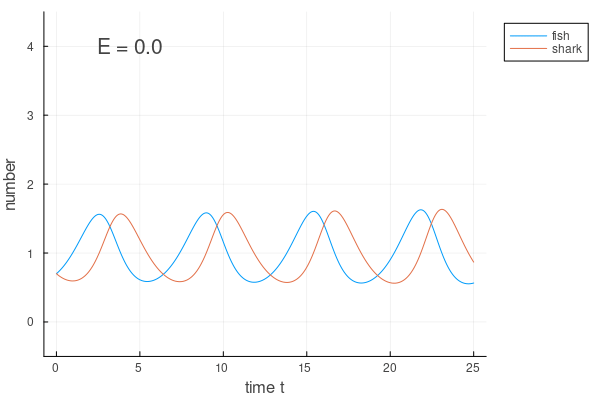

In [26]:
@gif for E in 0.0:0.01:0.8

    # ここから end まではこれまでと本質的に同じ．
    u,v = u0, v0
    uv_f_sq = [ u0 v0 ]
    
    for i in 1:N
        u,v = euler_fishing(u,v,E)
        uv_f_sq = vcat(uv_f_sq, [ u v ])
    end

    plot(t_sq, uv_f_sq, label = ["fish" "shark"] )
    # @gif マクロは font に対してあまり自由度はないようなので alphabet 表記で．

    annotate!(2.5, 4.0, ("E = $E", :left))
    # 漁業効果の強さも表示しておく
end

[ Info: Saved animation to /Users/taketosaeki/Desktop/julia-making/tmp.gif


Plots.AnimatedGif("/Users/taketosaeki/Desktop/julia-making/tmp.gif")
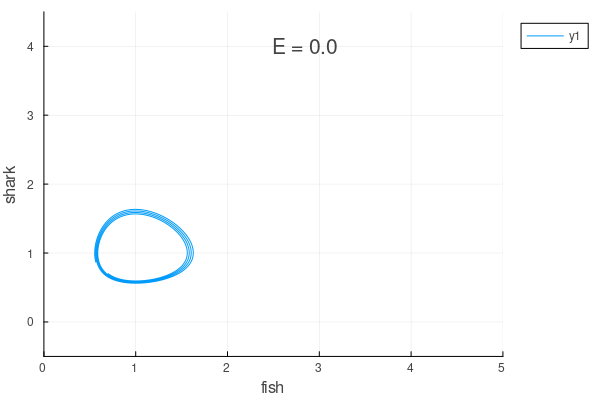

In [46]:
default( ylims = (-0.5, 4.5), xlims=(0,5), aspect_ratio = :none,
   xlabel = "fish", ylabel = "shark" )
# グラフの描画範囲を統一することで見やすくする．
# この数字は，教官がさきにおおよそ計算したおいたもの．

lastT = 25
Δt = 0.01
N = round(Int, lastT/Δt)   # 最終時間ステップは整数に．

@gif for E in 0.0:0.01:0.8
    
    u,v = u0, v0
    uv_f_sq = [ u0 v0 ]
    
    for i in 1:N
        u,v = euler_fishing(u,v,E)
        uv_f_sq = vcat(uv_f_sq, [ u v ])
    end

    plot(uv_f_sq[:,1],uv_f_sq[:,2])
    annotate!(2.5, 4.0, ("E = $E", :left))
end